# K Nearest Neighbors Projekt - Lösung

Da KNN so ein einfacher Algorithmus ist werden wir in diesem "Projekt" einfach eine Übung durchführen. Die Schritte gehen so gesehen nicht über die Lektion hinaus und sollen einfach die Implementierung wiederholen. So könnt ihr sicherer im Umgang mit KNN und der richtigen Library werden.

## Die Daten laden

### Die Iris Daten

Wir werden die [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) Daten für dieses Projekt nutzen. Es ist ein kleiner Datensatz der Eigenschaften von Blumen beinhaltet. Auf Deutsch lautet der Name der Spezies "Lilie". Den genauen Typ versuchen wir anhand ihrer Eigenschaften zu bestimmen.

**Verwende die ISLR Library, um die Iris Daten aufzurufen. Schaue außerdem deren Head an.**


In [1]:
library(ISLR)

In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


## Daten standardisieren

In diesem Fall liegen alle Feature mit derselben Skala vor. Nichtsdestotrotz ist es üblich (insbesondere bei KNN), die Features zu standardisieren. Wir sollten dies also zur Übung einfach auch für unseren Datensatz noch einmal vornehmen:

**Nutze `scale()`, um die Features zu standardisieren. Speichere die standardisierten Werte in einer neuen Variablen.**

In [4]:
stand.features <- scale(iris[1:4])

**Überprüfe, ob die standardisierung funktioniert hat, indem du dir die Varianz einer der neuen Spalten anschaust.**

In [5]:
var(stand.features[,1])

[1] 1

**Joine die Standardisierten Daten mit der Ergebnisspalte (in diesem Fall die Spalte, die die Spezies beinhaltet.**

In [6]:
final.data <- cbind(stand.features,iris[5])

In [7]:
head(final.data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


## Train Test Split

**Nutze die `caTools` Library, um die standardisierten Daten in Trainings- und Testdaten aufzuteilen. Verwende das Verhältnis 70 zu 30.**

In [8]:
set.seed(101)

library(caTools)

sample <- sample.split(final.data$Species, SplitRatio = .70)
train <- subset(final.data, sample == TRUE)
test <- subset(final.data, sample == FALSE)

## Ein KNN Modell aufbauen

**Rufe die `class` Library auf.**

In [9]:
library(class)

**Verwende die `knn()` Funktion, um die Spezies für die Testdaten vorherzusagen. Beginne mit k=1.**

In [10]:
predicted.species <- knn(train[1:4],test[1:4],train$Species,k=1)

In [11]:
predicted.species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor virginica  versicolor versicolor versicolor
[25] versicolor versicolor virginica  versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

**Wie hoch ist die Fehlerrate?**

In [12]:
mean(test$Species != predicted.species)

[1] 0.04444444

## Einen k-Wert wählen

Obwohl der Datensatz recht klein ist, um ein gutes Gefühl für den richtigen k-Wert zu erhalten sollten wir es üben.

**Erstelle ein Diagramm der Fehler für die k-Werte von 1 bis 10.**

In [13]:
predicted.species <- NULL
error.rate <- NULL

for(i in 1:10){
    set.seed(101)
    predicted.species <- knn(train[1:4],test[1:4],train$Species,k=i)
    error.rate[i] <- mean(test$Species != predicted.species)
}

In [14]:
library(ggplot2)
k.values <- 1:10
error.df <- data.frame(error.rate,k.values)

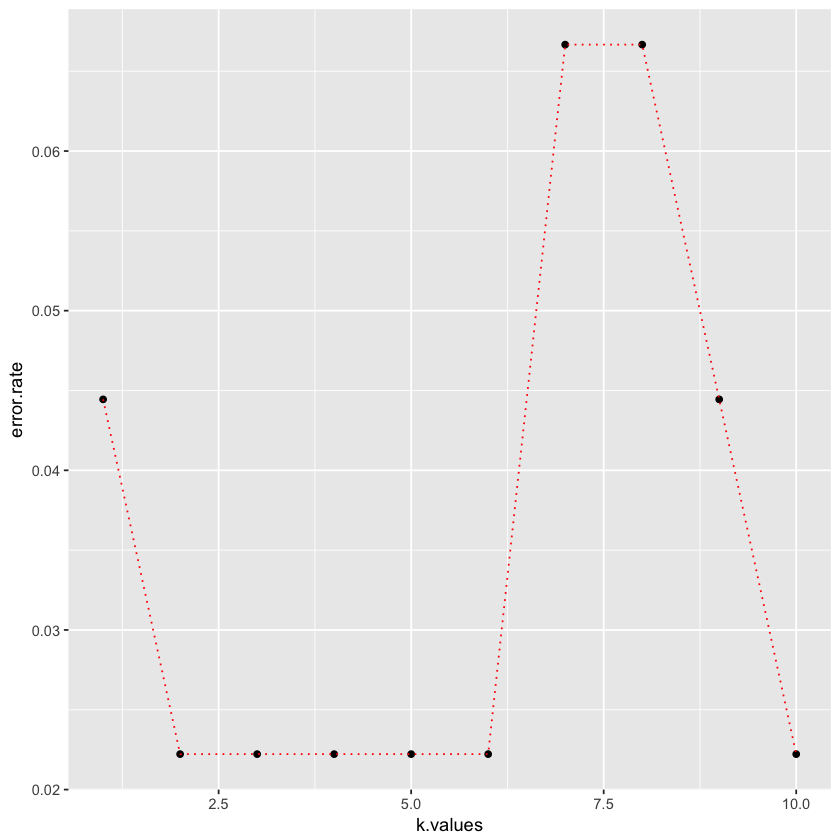

In [15]:
pl <- ggplot(error.df,aes(x=k.values,y=error.rate)) + geom_point()
pl + geom_line(lty="dotted",color='red')

### Ergebnis

Dir sollte im Diagramm auffallen, dass der Fehler für k-Werte zwischen 2 und 6 am niedrigsten ist. Dann beginnt er wieder zu steigen, was daran liegt, wie klein der Datensatz ist. Bei k=10 verwenden wir ungefähr 10% der Daten, was schon sehr viel ist.

## Optionale Aufgabe

Du solltest das Konzept der KNN mittlerweile gut verinnerlicht haben. Für weitere Übung bietet das UCI Machine Learning Repository tolle Datensätze. Du kannst dir [hier](http://archive.ics.uci.edu/ml/index.php) einen Datensatz aussuchen und das oben verwendete Konzept darauf anwenden.

# Gut gemacht!